# Proyecto Aurelion
## Análisis Exploratorio de Ventas · Curso de Ciencia de Datos

Este notebook explora el flujo completo de análisis de datos comerciales mediante Python, con un modelo simulado que contiene 7 tablas relacionadas. El objetivo es consolidar los datos, analizarlos desde múltiples dimensiones y presentar resultados clave de forma visual.

In [1]:
#Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuraciones generales
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

print("Librerías cargadas correctamente.")

Librerías cargadas correctamente.


## Paso 1: Carga de Datos

Importamos los 7 archivos de datos estructurados, proporcionados en formato `.xlsx`.

In [3]:
# Verificar o reemplazar las rutas de los archivos 
clientes = pd.read_excel("../BD_Aurelion_expanded/clientes_expanded.xlsx")
productos = pd.read_excel("../BD_Aurelion_expanded/productos_expanded.xlsx")
ventas = pd.read_excel("../BD_Aurelion_expanded/ventas_expanded.xlsx")
detalle_ventas = pd.read_excel("../BD_Aurelion_expanded/detalle_ventas_expanded.xlsx")
sucursales = pd.read_excel("../BD_Aurelion_expanded/sucursales_expanded.xlsx")
vendedores = pd.read_excel("../BD_Aurelion_expanded/vendedores_expanded.xlsx")
medios_pago = pd.read_excel("../BD_Aurelion_expanded/medios_pago_expanded.xlsx")

print("Tablas cargadas correctamente.")

Tablas cargadas correctamente.


## Paso 2: Exploración y Validación Inicial

Revisamos estructura, nulos y tipos de datos para cada DataFrame.

In [4]:
datasets = {
    'clientes': clientes,
    'productos': productos,
    'ventas': ventas,
    'detalle_ventas': detalle_ventas,
    'sucursales': sucursales,
    'vendedores': vendedores,
    'medios_pago': medios_pago
}

for name, df in datasets.items():
    print(f"\n--- {name.upper()} ---")
    print(df.info())
    print(df.isnull().sum())


--- CLIENTES ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id_cliente           100 non-null    int64         
 1   nombre_cliente       100 non-null    object        
 2   email                100 non-null    object        
 3   ciudad               100 non-null    object        
 4   fecha_alta           100 non-null    datetime64[ns]
 5   genero               100 non-null    object        
 6   edad_rango           100 non-null    object        
 7   activo_como_cliente  100 non-null    bool          
dtypes: bool(1), datetime64[ns](1), int64(1), object(5)
memory usage: 5.7+ KB
None
id_cliente             0
nombre_cliente         0
email                  0
ciudad                 0
fecha_alta             0
genero                 0
edad_rango             0
activo_como_cliente    0
dtype: int64

--- PRODUCTO

## Paso 3: Limpieza y Conversión de Fechas

Convertimos campos de fecha y revisamos integridad.

In [5]:
clientes["fecha_alta"] = pd.to_datetime(clientes["fecha_alta"])
ventas["fecha"] = pd.to_datetime(ventas["fecha"])
vendedores["fecha_ingreso"] = pd.to_datetime(vendedores["fecha_ingreso"])
print("Fechas convertidas correctamente.")

Fechas convertidas correctamente.


## Paso 4: Unificación de Tablas

Unimos las tablas según claves foráneas para construir un DataFrame maestro `df_master`.

In [8]:
# 1. Unimos detalle con productos
dv_prod = detalle_ventas.merge(productos, on='id_producto', how='left')

# 2. Unimos con venta (encabezado)
ventas_detalle = dv_prod.merge(ventas, on='id_venta', how='left')

# 3. Unimos con clientes
completo_clientes = ventas_detalle.merge(clientes, on='id_cliente', how='left')

# 4. Unimos con sucursales
completo_sucursal = completo_clientes.merge(sucursales, on='id_sucursal', how='left')

# 5. Unimos con vendedores
completo_vendedor = completo_sucursal.merge(vendedores, on='id_vendedor', how='left')

# 6. Unimos con medios de pago
df_master = completo_vendedor.merge(medios_pago, on='id_medio_pago', how='left')

print("Unión de tablas realizada correctamente.")
df_master.head()
#df_master.shape

Unión de tablas realizada correctamente.


,id_venta,id_producto,nombre_producto_x,cantidad,precio_unitario_x,importe,descuento_aplicado_pct,subtotal,nombre_producto_y,categoria,precio_unitario_y,subcategoria,fecha,id_cliente,id_sucursal_x,id_vendedor,id_medio_pago,nombre_cliente_x,email_x,medio_pago_original,estado_venta,monto_bruto,monto_neto,nombre_cliente_y,email_y,ciudad_x,fecha_alta,genero,edad_rango,activo_como_cliente,nombre_sucursal,ciudad_y,provincia,nombre_vendedor,id_sucursal_y,fecha_ingreso,activo,nombre_medio_pago
0,1,90,Toallas Húmedas x50,1,29.02,29.02,0,29.02,Toallas Húmedas x50,Cuidado Personal,29.02,Higiene,2023-01-02,73,5,11,1,Yamila Diaz,yamila.diaz@mail.com,efectivo,OK,29.02,29.02,Yamila Diaz,yamila.diaz@mail.com,Alta Gracia,2023-03-14,F,41-55,True,Tienda Aurelion - Alta Gracia,Alta Gracia,Cordoba,Vendedor 11,5,2022-10-12,True,efectivo
1,2,82,Aceitunas Negras 200g,5,23.94,119.70,0,119.70,Aceitunas Negras 200g,Almacén,23.94,Conservas y Salsas,2023-01-03,74,2,12,3,Zoe Flores,zoe.flores@mail.com,qr,OK,482.98,482.98,Zoe Flores,zoe.flores@mail.com,Carlos Paz,2023-03-15,M,26-40,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 12,2,2023-03-09,True,qr
2,2,39,Helado Vainilla 1L,5,4.69,23.45,0,23.45,Helado Vainilla 1L,Congelados,4.69,Postres Helados,2023-01-03,74,2,12,3,Zoe Flores,zoe.flores@mail.com,qr,OK,482.98,482.98,Zoe Flores,zoe.flores@mail.com,Carlos Paz,2023-03-15,M,26-40,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 12,2,2023-03-09,True,qr
3,2,70,Fernet 750ml,2,40.61,81.22,0,81.22,Fernet 750ml,Bebidas Alcohólicas,40.61,Destilados,2023-01-03,74,2,12,3,Zoe Flores,zoe.flores@mail.com,qr,OK,482.98,482.98,Zoe Flores,zoe.flores@mail.com,Carlos Paz,2023-03-15,M,26-40,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 12,2,2023-03-09,True,qr
4,2,22,Medialunas de Manteca,1,20.69,20.69,0,20.69,Medialunas de Manteca,Panadería y Repostería,20.69,Facturas,2023-01-03,74,2,12,3,Zoe Flores,zoe.flores@mail.com,qr,OK,482.98,482.98,Zoe Flores,zoe.flores@mail.com,Carlos Paz,2023-03-15,M,26-40,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 12,2,2023-03-09,True,qr


## Paso 5: Ingeniería de Características

Creamos columnas adicionales como año, mes, día de la semana, y monto final con descuentos.

In [9]:
df_master["año"] = df_master["fecha"].dt.year
df_master["mes"] = df_master["fecha"].dt.month
df_master["dia_nombre"] = df_master["fecha"].dt.day_name()
df_master["descuento_pct"] = df_master["descuento_aplicado_pct"].fillna(0)
df_master["monto_final"] = df_master["subtotal"] - (df_master["subtotal"] * df_master["descuento_pct"])

print("Columnas nuevas generadas.")
df_master[['fecha', 'año', 'mes', 'dia_nombre', 'monto_final']].head()

Columnas nuevas generadas.


,fecha,año,mes,dia_nombre,monto_final
0,2023-01-02,2023,1,Monday,29.02
1,2023-01-03,2023,1,Tuesday,119.70
2,2023-01-03,2023,1,Tuesday,23.45
3,2023-01-03,2023,1,Tuesday,81.22
4,2023-01-03,2023,1,Tuesday,20.69


## Paso 6: Análisis de Métricas Relevantes

A continuación realizamos distintos análisis para responder preguntas clave del negocio.

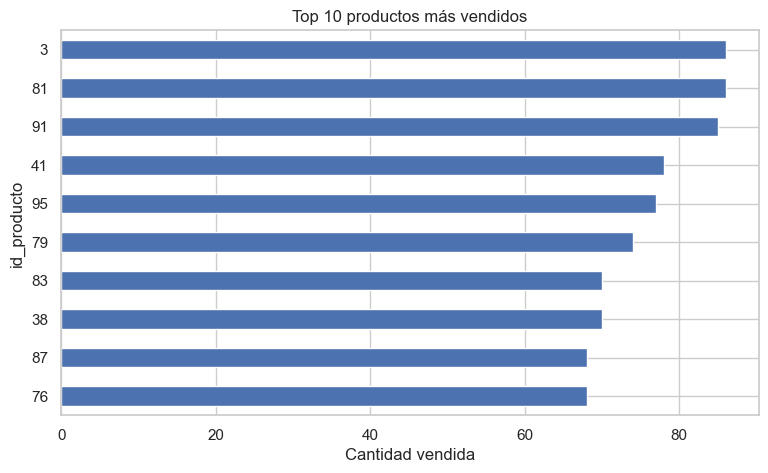

id_producto
3     86
81    86
91    85
41    78
95    77
79    74
83    70
38    70
87    68
76    68
Name: cantidad, dtype: int64


In [ ]:
#Productos más vendidos
top_productos = df_master.groupby("id_producto")["cantidad"].sum().sort_values(ascending=False).head(10)
top_productos.plot(kind="barh", title="Top 10 productos más vendidos", figsize=(9,5))
plt.xlabel("Cantidad vendida")
plt.gca().invert_yaxis()
plt.show()
print("" + str(top_productos))

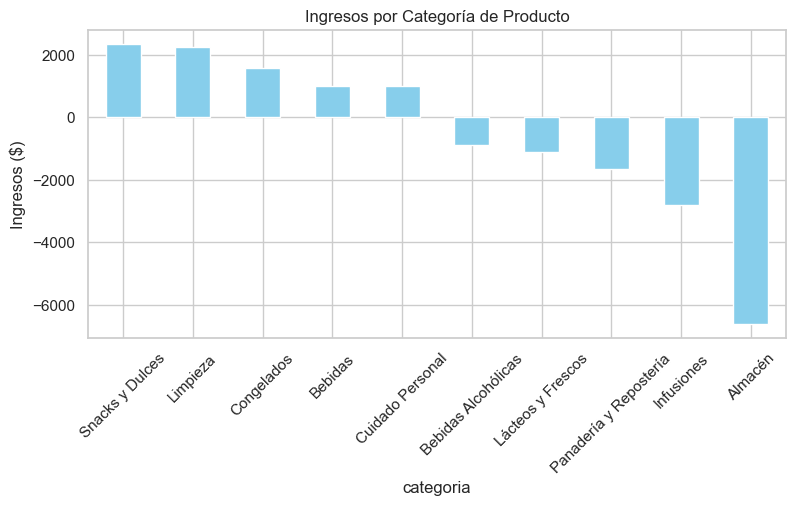

In [24]:
#Ingresos por categoría y sucursal
ingresos_categoria = df_master.groupby("categoria")["monto_final"].sum().sort_values(ascending=False)
ingresos_categoria.plot(kind="bar", title="Ingresos por Categoría de Producto", figsize=(9,4), color='skyblue')
plt.ylabel("Ingresos ($)")
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Monto de Ventas ($)')

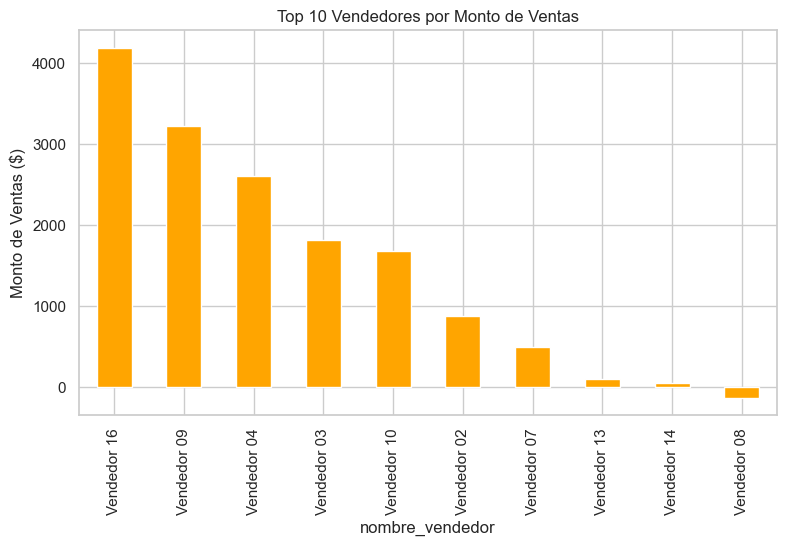

In [20]:
#Vendedores con mayores ventas  
top_vendedores = df_master.groupby("nombre_vendedor")["monto_final"].sum().sort_values(ascending=False).head(10)
top_vendedores.plot(kind="bar", title="Top 10 Vendedores por Monto de Ventas", figsize=(9,5), color='orange')
plt.ylabel("Monto de Ventas ($)")                   

C:\Users\KEILY\AppData\Local\Temp\ipykernel_10936\4077324141.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vendedores.values, y=top_vendedores.index, palette="crest")


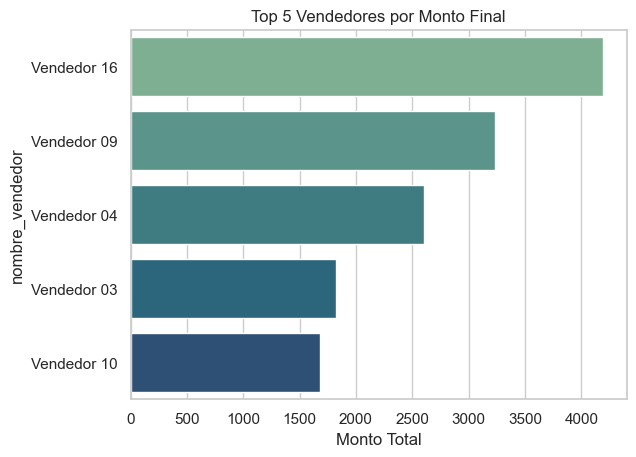

In [21]:
top_vendedores = df_master.groupby("nombre_vendedor")["monto_final"].sum().sort_values(ascending=False).head(5)
sns.barplot(x=top_vendedores.values, y=top_vendedores.index, palette="crest")
plt.title("Top 5 Vendedores por Monto Final")
plt.xlabel("Monto Total")
plt.show()

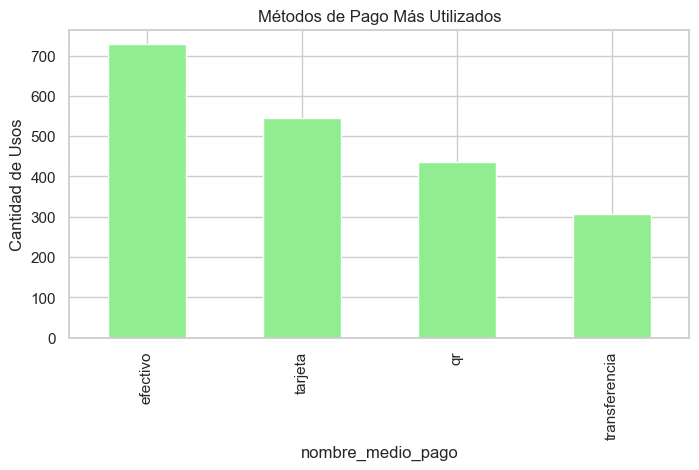

In [22]:
#Métodos de pago más utilizados
metodos_pago = df_master['nombre_medio_pago'].value_counts().head(5)        
metodos_pago.plot(kind="bar", title="Métodos de Pago Más Utilizados", figsize=(8,4), color='lightgreen')
plt.ylabel("Cantidad de Usos")  
plt.show()

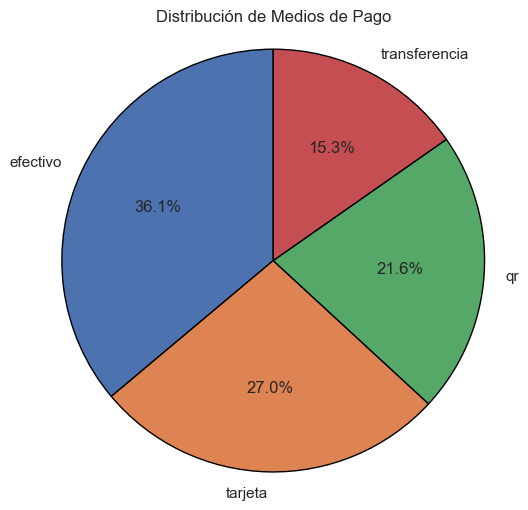

In [23]:
metodos = df_master["nombre_medio_pago"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(metodos, labels=metodos.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Distribución de Medios de Pago")
plt.axis('equal')
plt.show()

## Conclusión

Este análisis permitió consolidar múltiples fuentes de datos en un solo reporte integral. Se identificaron productos clave, vendedores destacados, diferencias entre sucursales y comportamiento de clientes frente a medios de pago.

Este reporte es una base sólida para análisis predictivo, dashboards interactivos o modelo de segmentación a futuro.